# Delta Equity 45 Days

Usage in C2Score: `+ ( %[Delta Equity 45 Days]% < 0 ?  -200 :  0 )`

In [1]:
source("JupyterUtils.R")
source("C2ScoreHypothesisPresentation.R")

     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        5170      187633-3434647.9000     -2.8000      0.0000    112.5260      4.10003434442.3000  20075.3324 


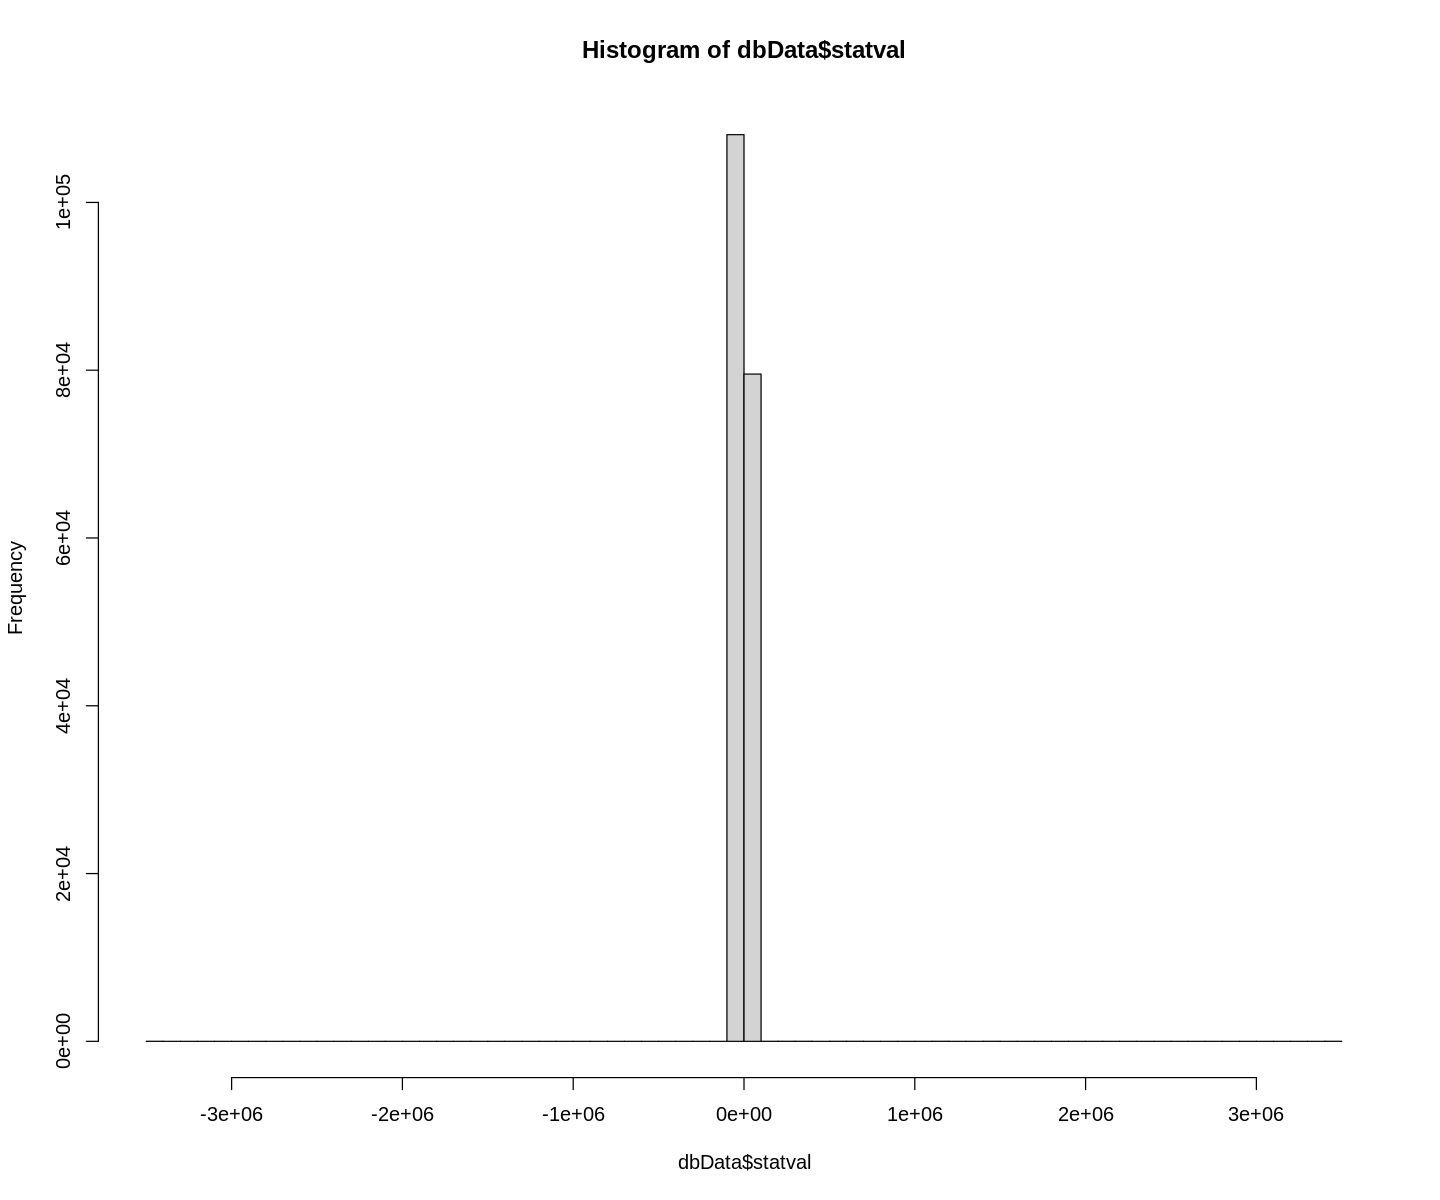

In [2]:
# What data we have.
dbData = getC2ScoreDbData("select systemid, YYYYMMDD, statval
            from historical_stats_modern where statname='deltaequityp45'") 
overview(dbData)
hist(dbData$statval,breaks=50)

     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        4952      179268    -50.0000     -2.4000      0.0000      0.4922      3.8000     50.0000     11.3427 


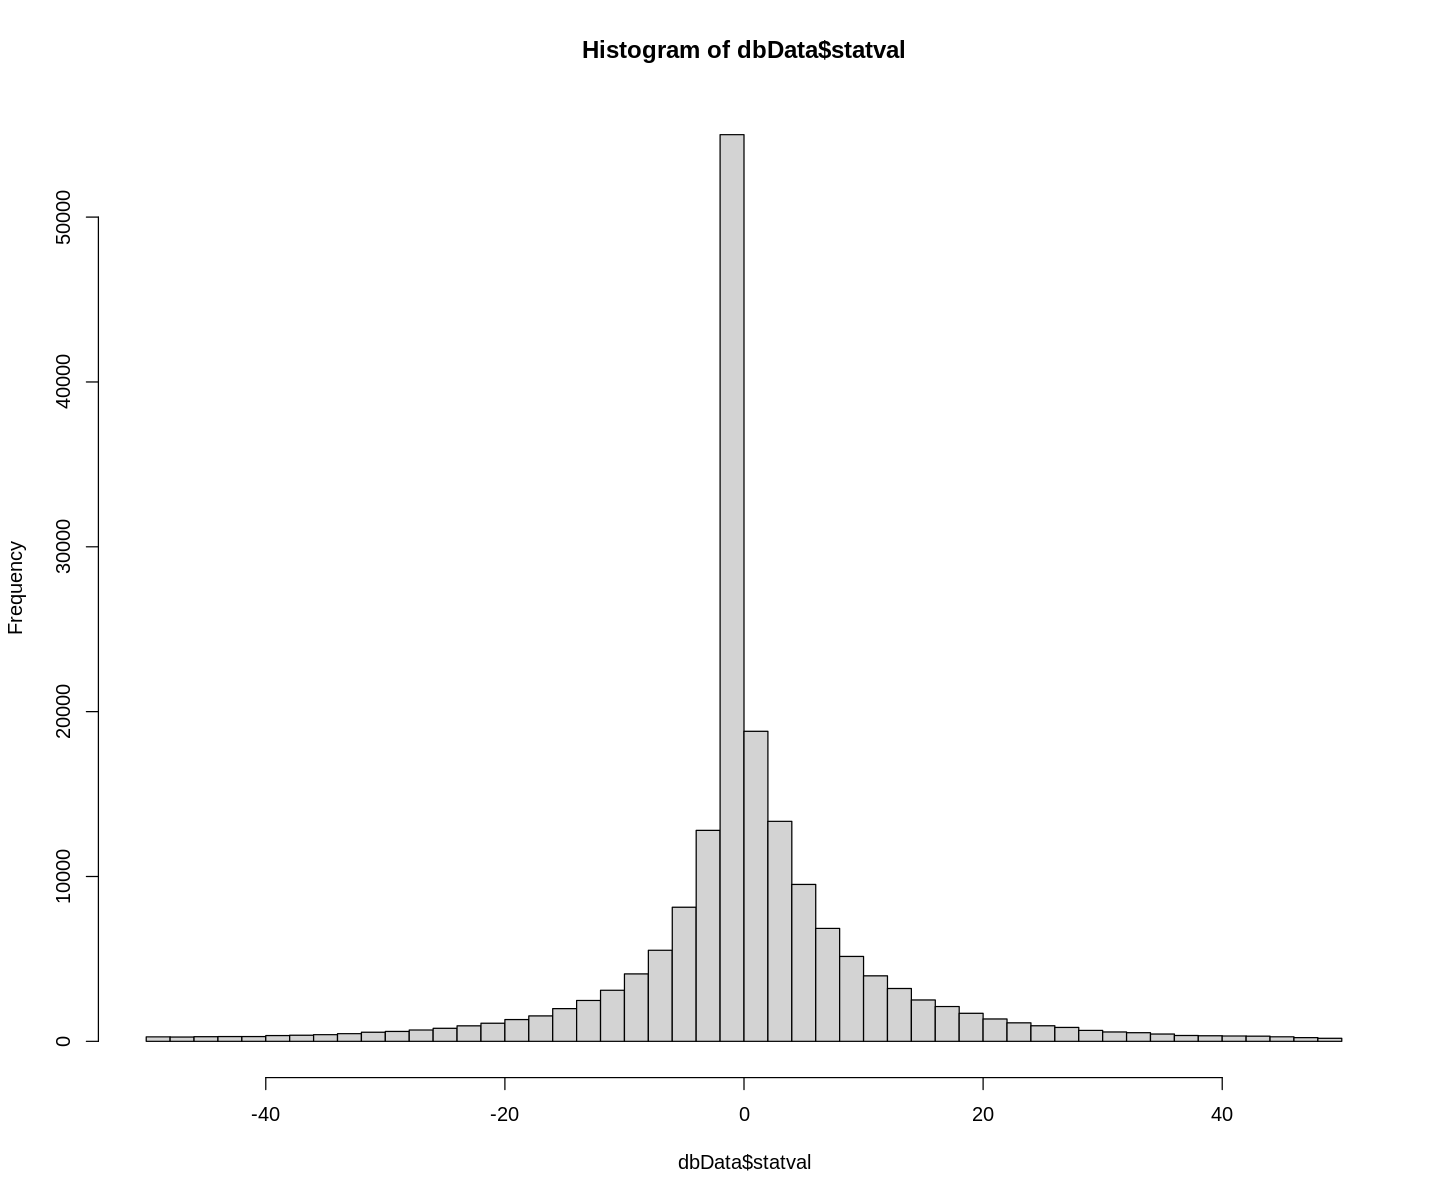

In [3]:
# Delta equity 45 days (1.5 month)? Somewhere between -50 and +50 percent
dbData = getC2ScoreDbData("select systemid, YYYYMMDD, statval
            from historical_stats_modern where statname='deltaequityp45' 
            and statval >= -50 and statval <= 50")
overview(dbData)
hist(dbData$statval,breaks=50)

     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        1658       32363      0.1000      2.1000      5.1000      7.8633     10.7000     50.0000      8.1973 


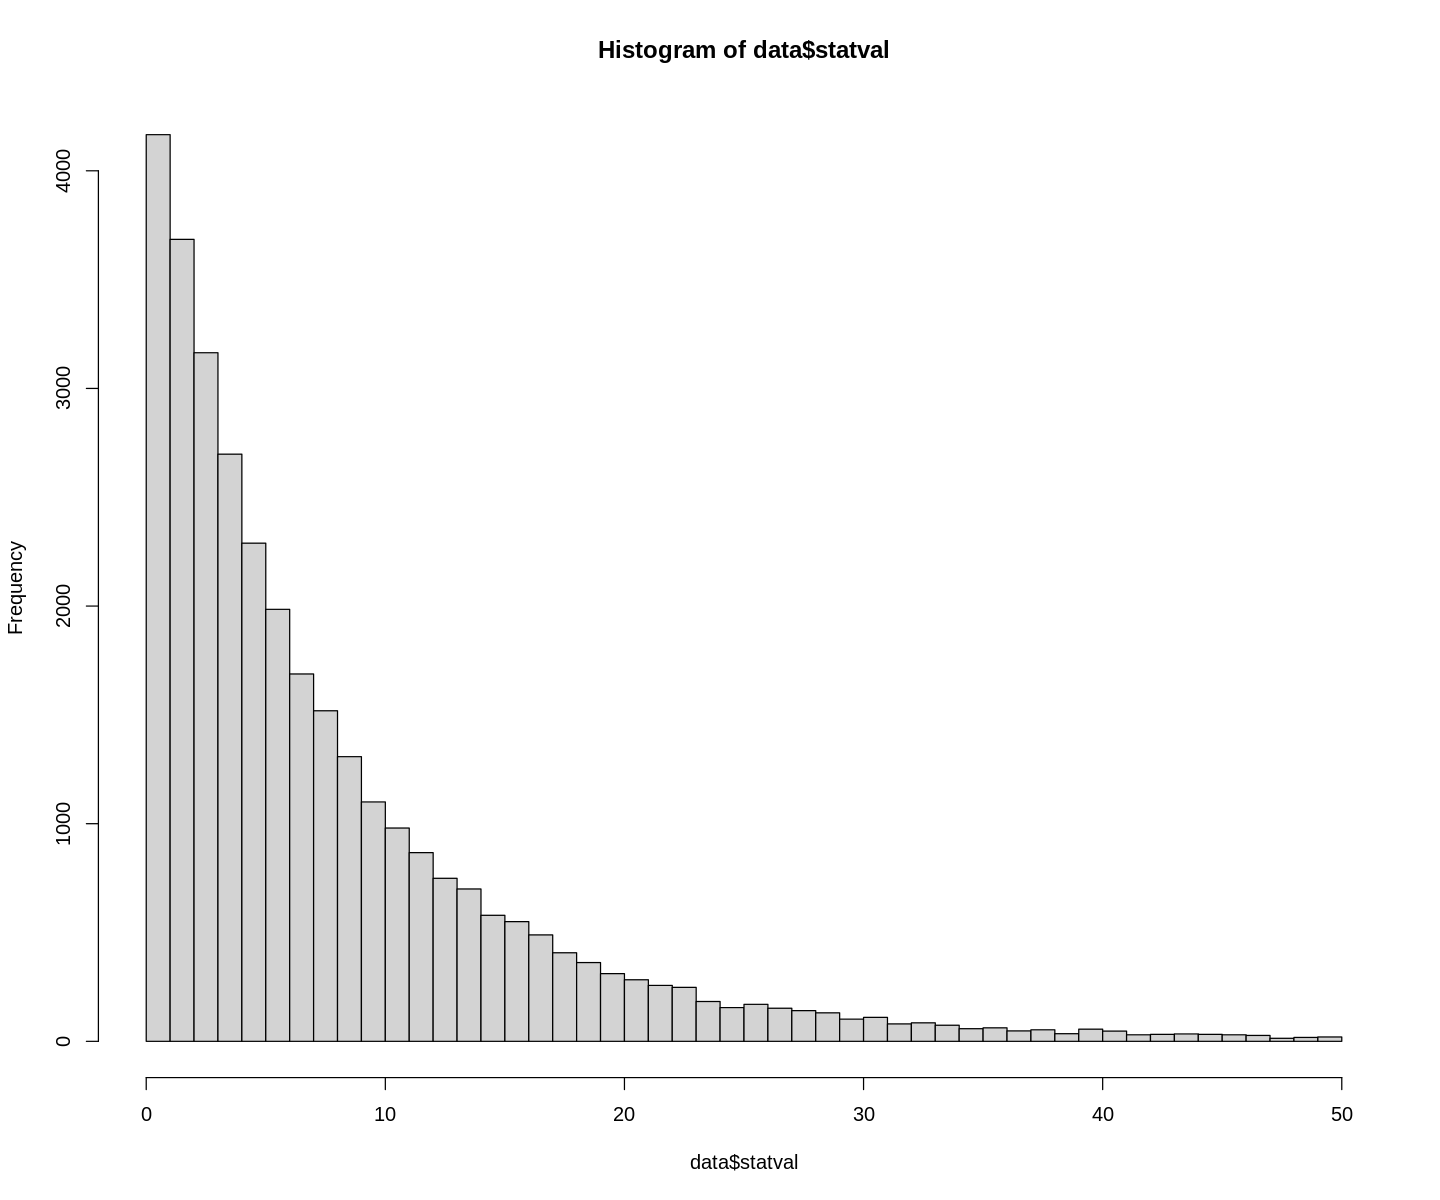

In [4]:
# Join with cleaned data. We want just positive values.
sql = "select statval, eq.*
 from ReturnsDataInIntervalsCleanedSkip090 eq
 join historical_stats_modern h on h.systemid=eq.systemid and h.YYYYMMDD = cast(date_format(DateStart,'%Y%m%d') AS UNSIGNED)
 where statname='deltaequityp45' and  statval > 0 and statval <= 50"

data = getC2ScoreDbData(sql)
overview(data)
hist(data$statval,breaks=50)



We have calculated and stored the whole population statistics of strategies daily returns after 7, 14, ..., 360 days. Day after day. Now, we selected a particular statistics data (a sample) from the whole population. Collective2 data are joined with a cleaned strategies set used for the population calculations. We want to know, if the average of returns of the sample is significantly higher than an average of returns of the whole population. A significance level is  0.05 .

The following table contains this hypothesis tests for defined stats intervals and all 7, 14, ..., 360 days time intervals.


Descriptive stats of all data selected in the experiment:
     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        1658       32363      0.1000      2.1000      5.1000      7.8633     10.7000     50.0000      8.1973 



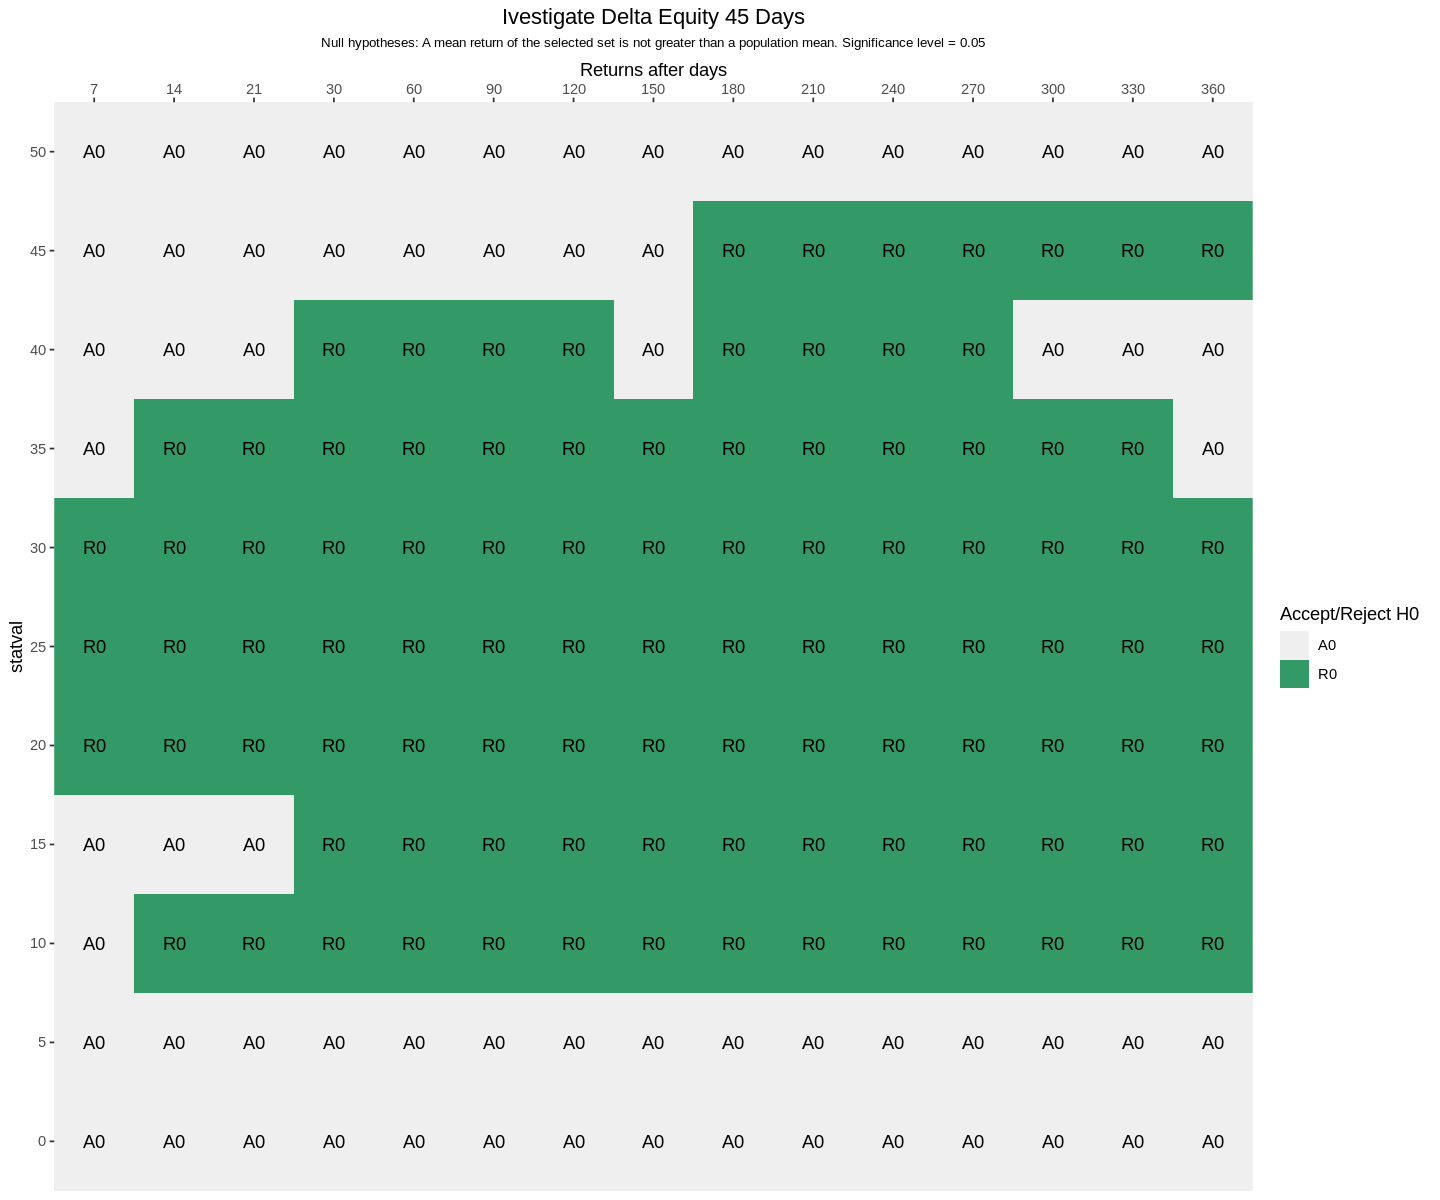

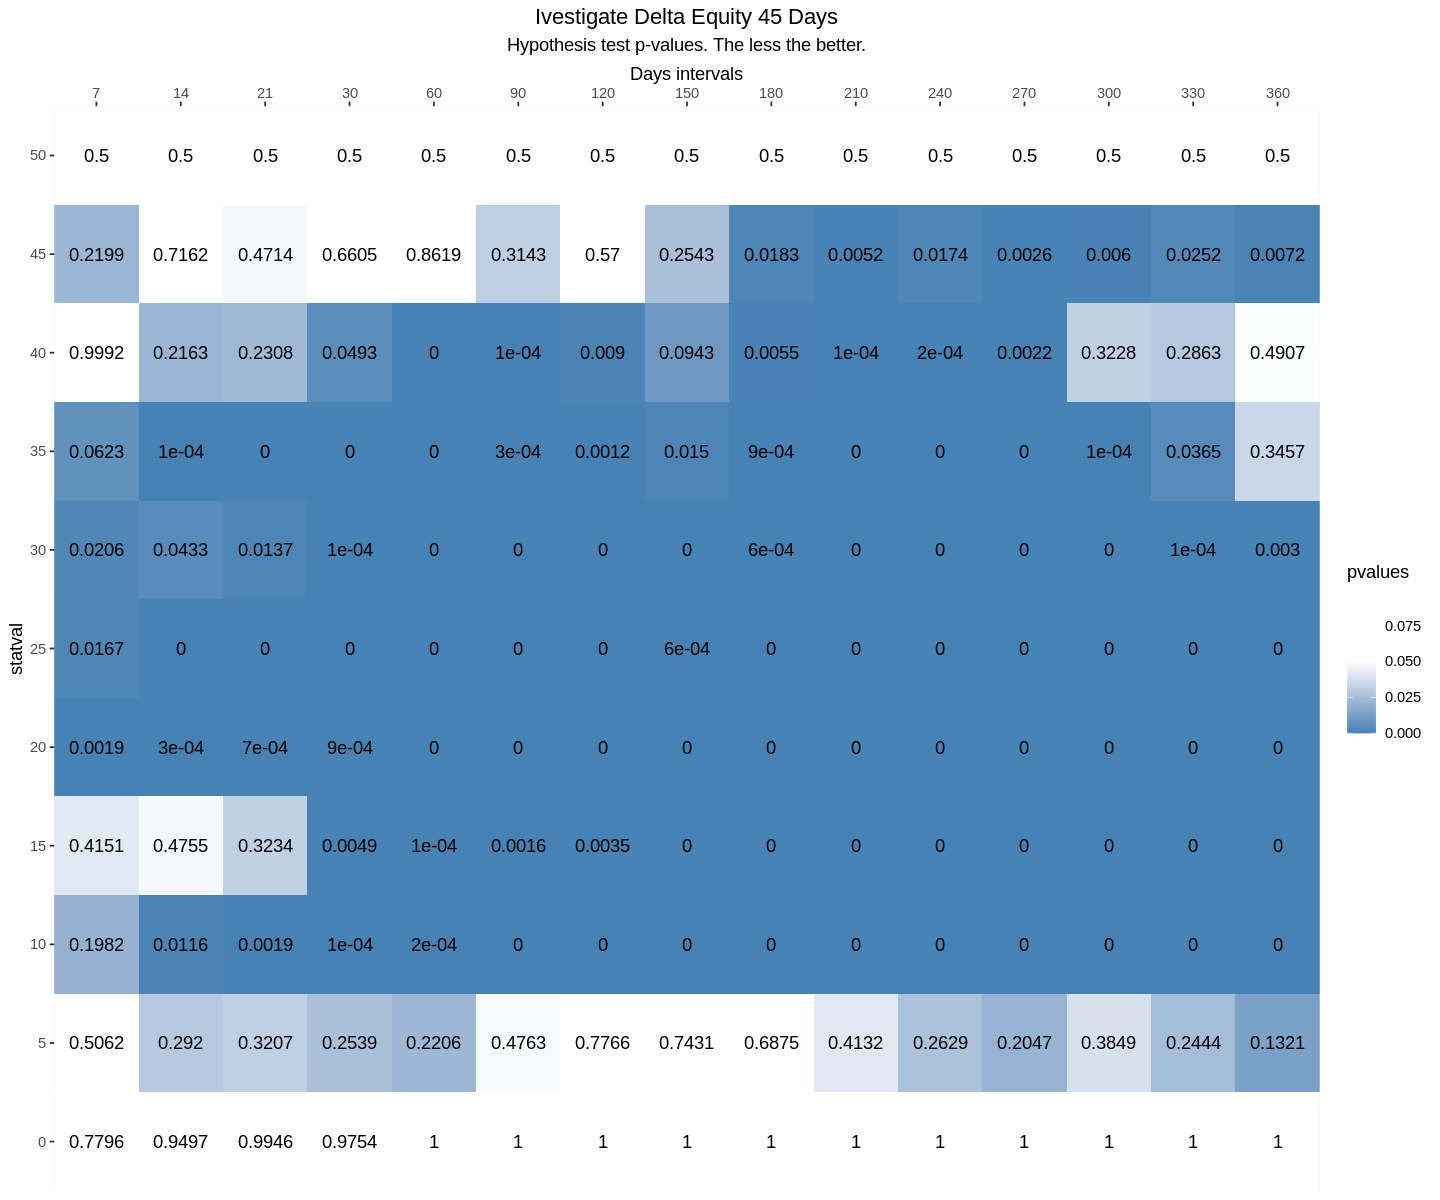

In [5]:
experiment = list(
  name = "deltaequityp45",
  description = "Ivestigate Delta Equity 45 Days",
  sqlText = sql, # the sql above  
  attributeName = "statval",
  attributeSteps = seq(from = 0, to = 50, by = 5))
result = makeExperiment(experiment)


Hypothesis test of sample standard deviation.

Alternative hypothesis: The sample standard deviation is less than the population SD.


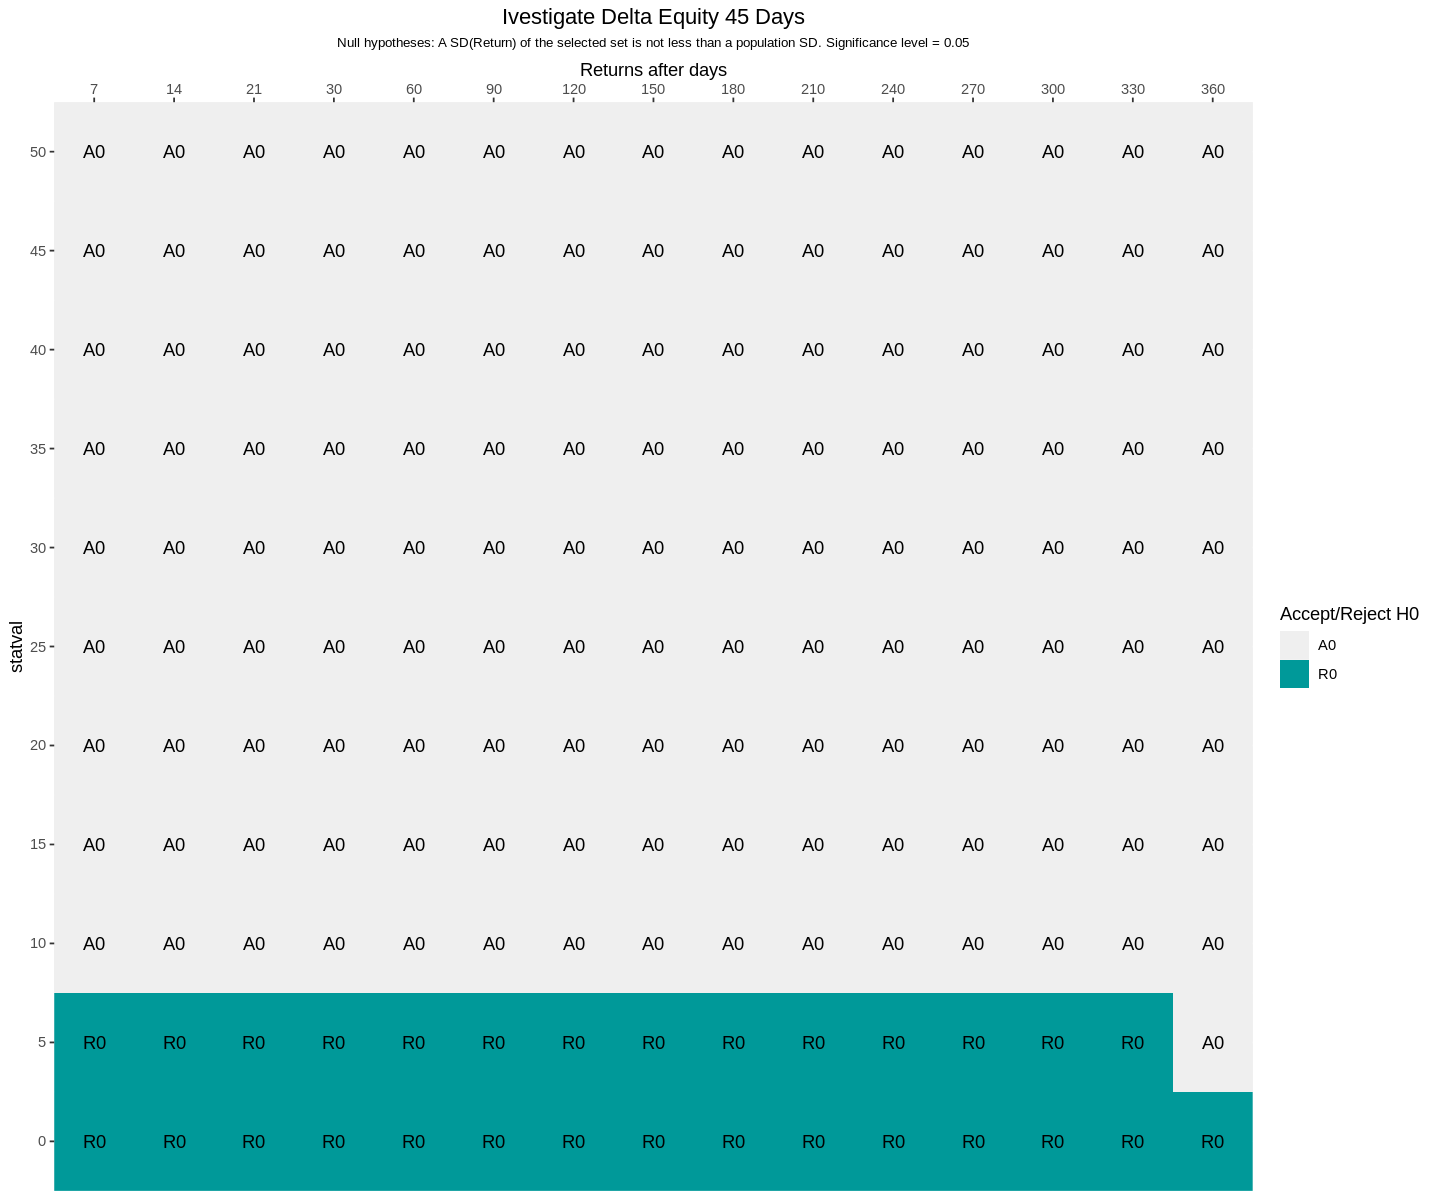

In [6]:
showSDLessHypothesisTest(experiment, result)

In [7]:
showObservationsCounts(experiment, result) 


The following table contains numbers of observations in the used statistics intervals.
A number of observations in the sample is an important part of the hypothesis testing. Be careful if it is low (less than 30).
Collective2 data are calculated in 7-days intervals. It means we have less observations which decreases hypotesis testing reliability. Use daily data tests if available.
Numbers of observations shown in this table are NOT numbers of C2 strategies! Every strategy can have many observations in any statistics interval. That is what is shown here.


Selection,Obs007,Obs014,Obs021,Obs030,Obs060,Obs090,Obs120,Obs150,Obs180,Obs210,Obs240,Obs270,Obs300,Obs330,Obs360
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
45 <= statval < 50,107,105,104,102,89,66,54,52,42,35,35,31,25,23,17
40 <= statval < 45,179,174,167,160,136,115,96,84,69,56,48,41,35,30,26
35 <= statval < 40,252,248,244,238,216,188,152,134,116,101,90,82,72,59,50
30 <= statval < 35,400,394,388,371,317,270,228,210,193,170,147,128,111,88,70
25 <= statval < 30,689,681,662,651,575,485,421,376,334,306,280,247,218,187,152
20 <= statval < 25,1133,1114,1101,1080,951,842,740,626,563,514,459,408,362,301,256
15 <= statval < 20,2116,2090,2058,2001,1811,1564,1356,1201,1092,998,892,799,706,625,548
10 <= statval < 15,3857,3812,3742,3664,3302,2840,2516,2252,2050,1884,1677,1491,1310,1181,1086
5 <= statval < 10,7617,7515,7400,7231,6592,5764,5192,4717,4273,3931,3493,3120,2752,2444,2207



SampleMetricValue minus PopulationMetricValue

This table shows differences between metric values calculated for the whole population and the current sample metric values. (See the chapter 'Population statistics'.)
This is different from our hypothesis test. Our hypothesis test tests an (alternative) hypothesis 'Is a mean of the sample greater than a mean of the population?'
But our metric is 'Mean divided by SD'. So the standard deviation plays a role in it.
Our metric is greater when a numerator is greater and/or denominator is less. It is up to you what you prefer.



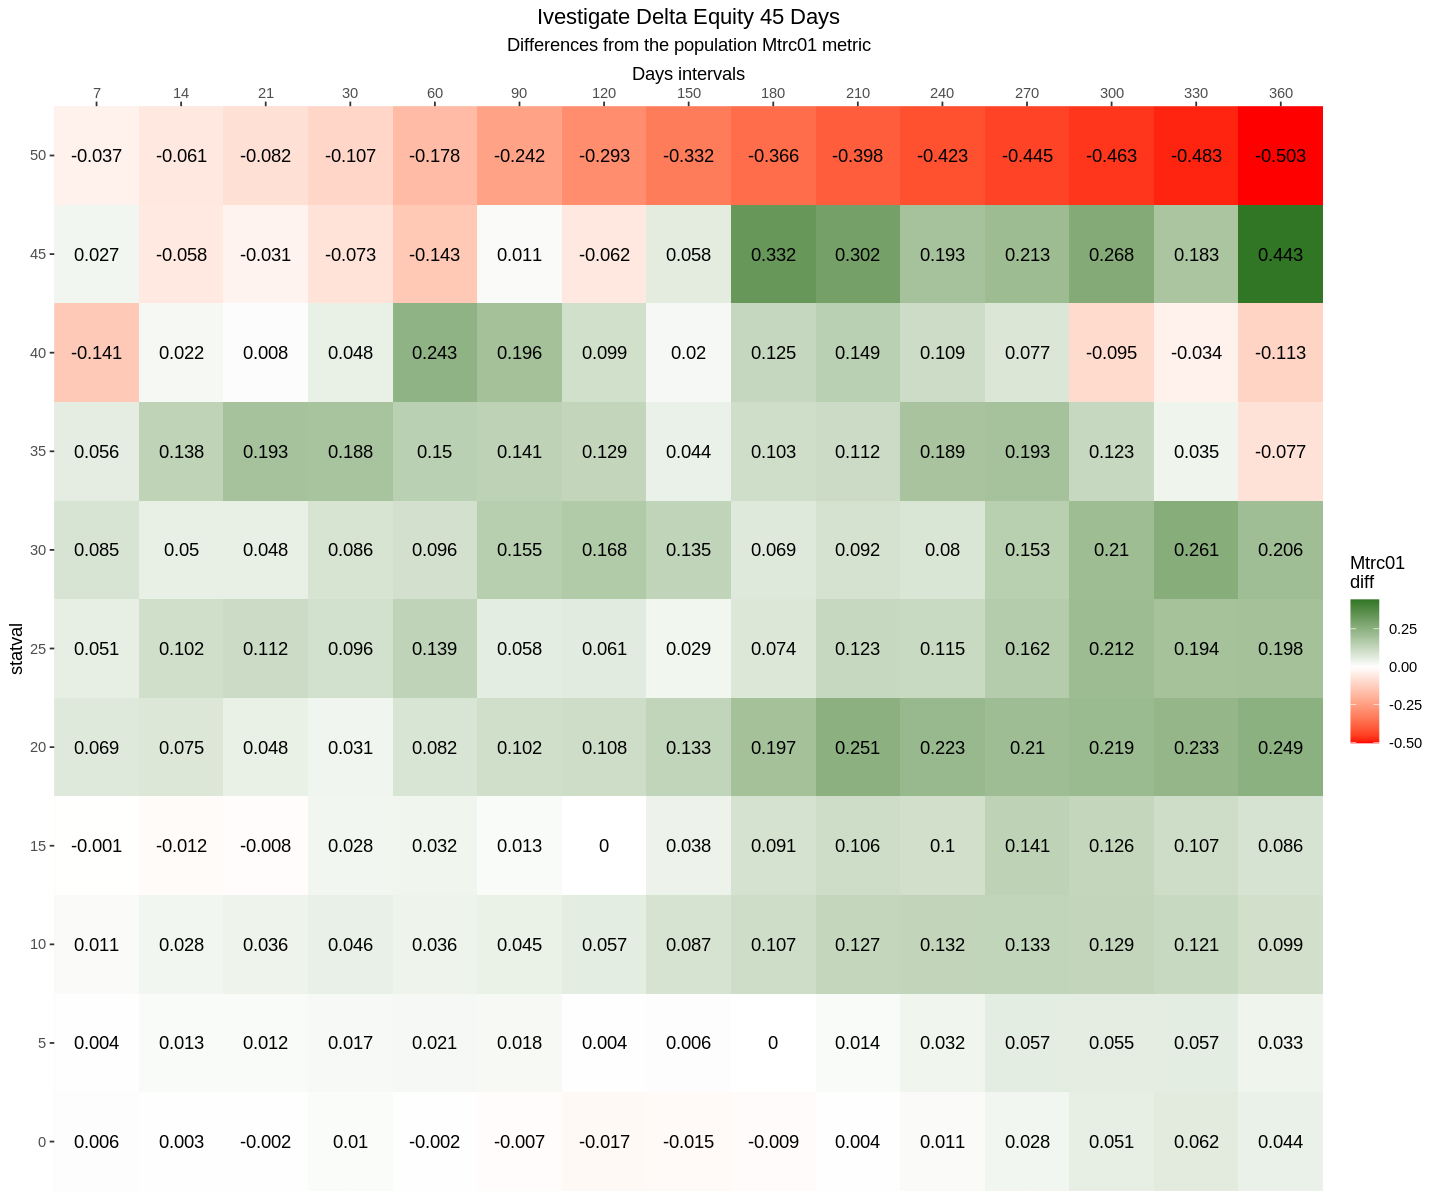

In [8]:
showMetricDifferences(experiment, result)

In [9]:
showSystemsCounts(experiment, result)



Numbers of strategies observed in defined intervals.

Selection,Sys007,Sys014,Sys021,Sys030,Sys060,Sys090,Sys120,Sys150,Sys180,Sys210,Sys240,Sys270,Sys300,Sys330,Sys360
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
45 <= statval < 50,87,85,84,82,69,53,45,43,35,28,28,26,21,19,15
40 <= statval < 45,122,118,115,110,92,78,61,54,45,40,33,31,26,23,21
35 <= statval < 40,174,171,167,164,146,130,104,93,85,77,69,62,56,49,41
30 <= statval < 35,251,249,245,237,203,171,141,124,113,103,94,86,72,59,48
25 <= statval < 30,341,341,329,323,277,231,202,177,154,141,132,116,103,89,69
20 <= statval < 25,459,454,448,441,377,326,296,256,228,206,189,176,163,135,115
15 <= statval < 20,683,672,661,642,559,469,403,358,324,298,271,244,221,191,160
10 <= statval < 15,940,930,908,885,774,647,559,493,429,402,359,318,282,244,211
5 <= statval < 10,1214,1194,1175,1150,1009,835,702,630,553,504,447,401,341,299,259


### Discussion

.....................

## Age > 90

     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        1381       26618      0.1000      2.0000      4.9000      7.5246     10.3000     50.0000      7.8444 


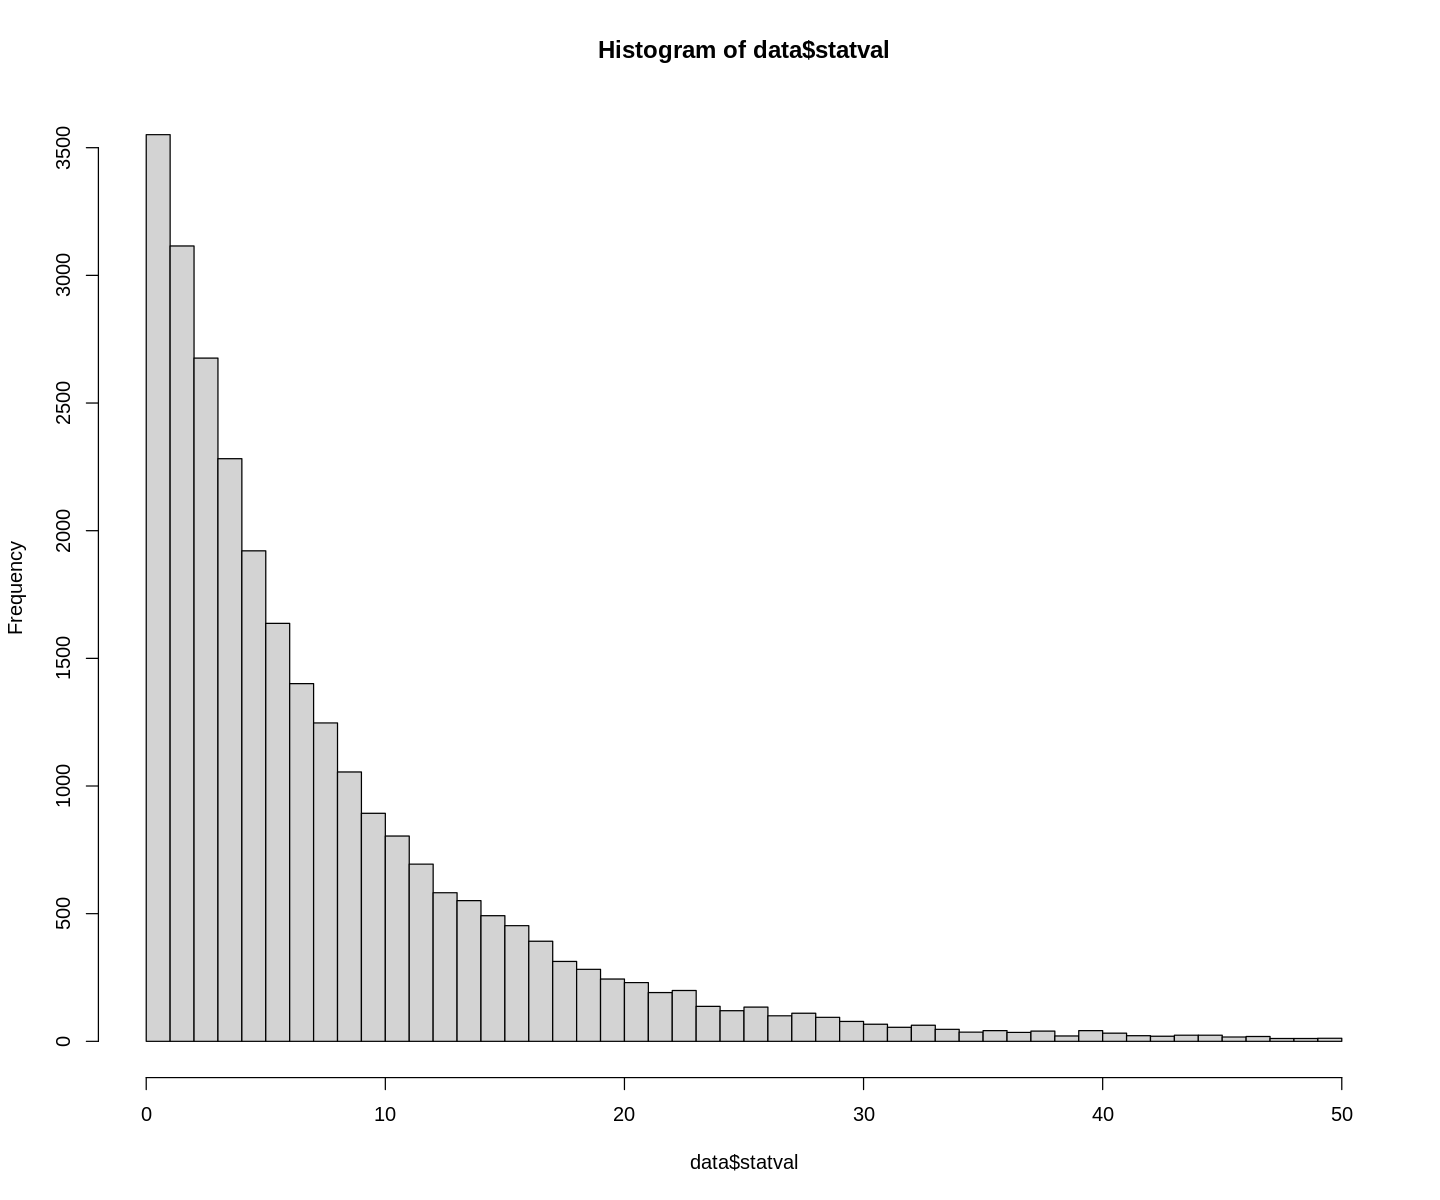

In [10]:
# Join with cleaned data. We want just positive values.
sql = "select statval, eq.*
 from ReturnsDataInIntervalsCleanedSkip090 eq
 join historical_stats_modern h on h.systemid=eq.systemid and h.YYYYMMDD = cast(date_format(DateStart,'%Y%m%d') AS UNSIGNED)
 where statname='deltaequityp45' and  statval > 0 and statval <= 50 and Age > 90"

data = getC2ScoreDbData(sql)
overview(data)
hist(data$statval,breaks=50)



We have calculated and stored the whole population statistics of strategies daily returns after 7, 14, ..., 360 days. Day after day. Now, we selected a particular statistics data (a sample) from the whole population. Collective2 data are joined with a cleaned strategies set used for the population calculations. We want to know, if the average of returns of the sample is significantly higher than an average of returns of the whole population. A significance level is  0.05 .

The following table contains this hypothesis tests for defined stats intervals and all 7, 14, ..., 360 days time intervals.


Descriptive stats of all data selected in the experiment:
     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        1381       26618      0.1000      2.0000      4.9000      7.5246     10.3000     50.0000      7.8444 



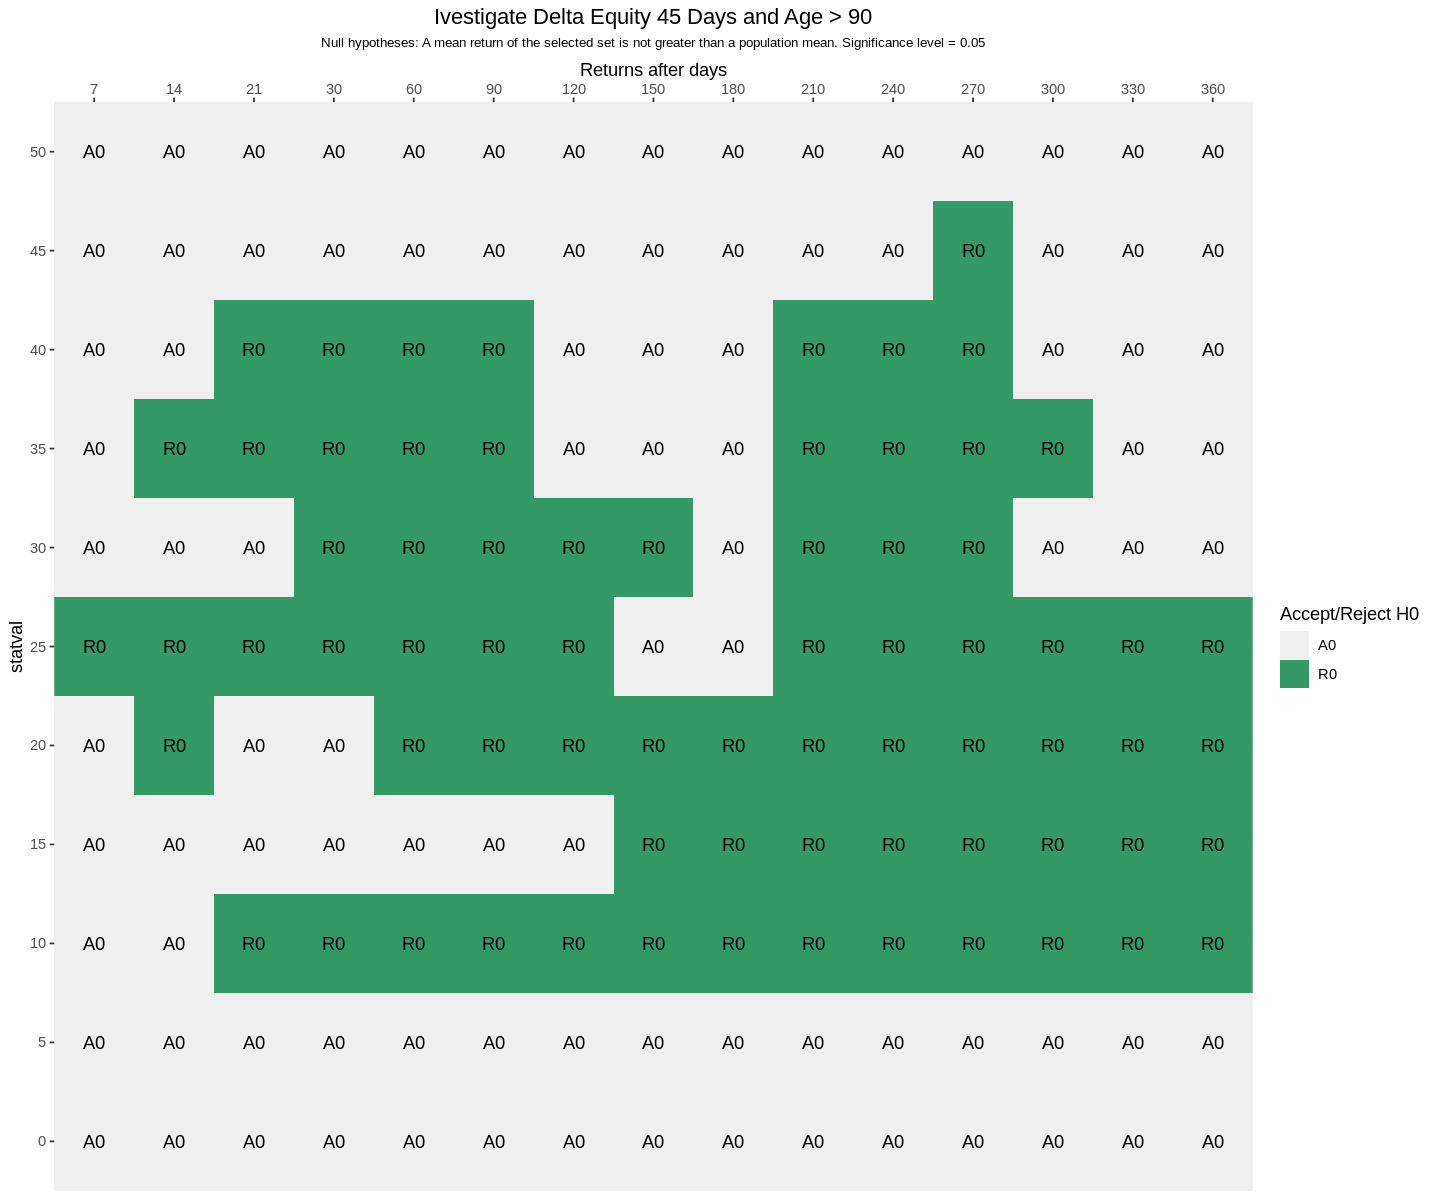

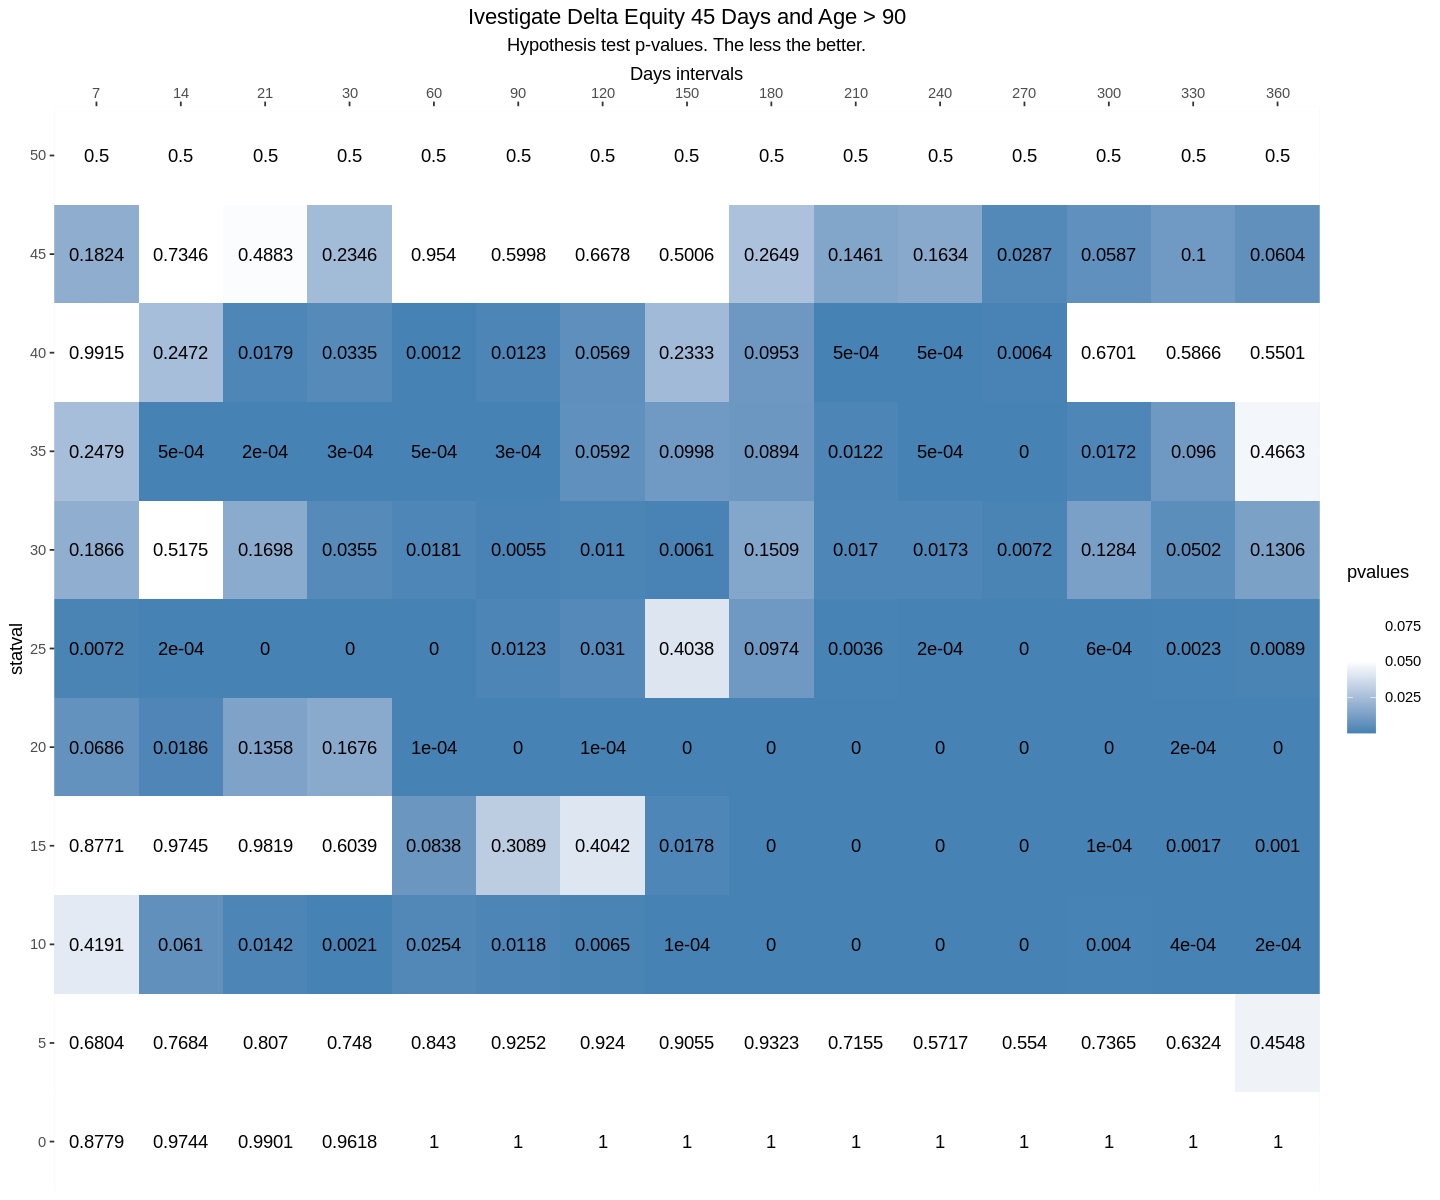

In [11]:
experiment = list(
  name = "deltaequityp45 and Age > 90",
  description = "Ivestigate Delta Equity 45 Days and Age > 90",
  sqlText = sql, # the sql above  
  attributeName = "statval",
  attributeSteps = seq(from = 0, to = 50, by = 5))
result = makeExperiment(experiment)


Hypothesis test of sample standard deviation.

Alternative hypothesis: The sample standard deviation is less than the population SD.


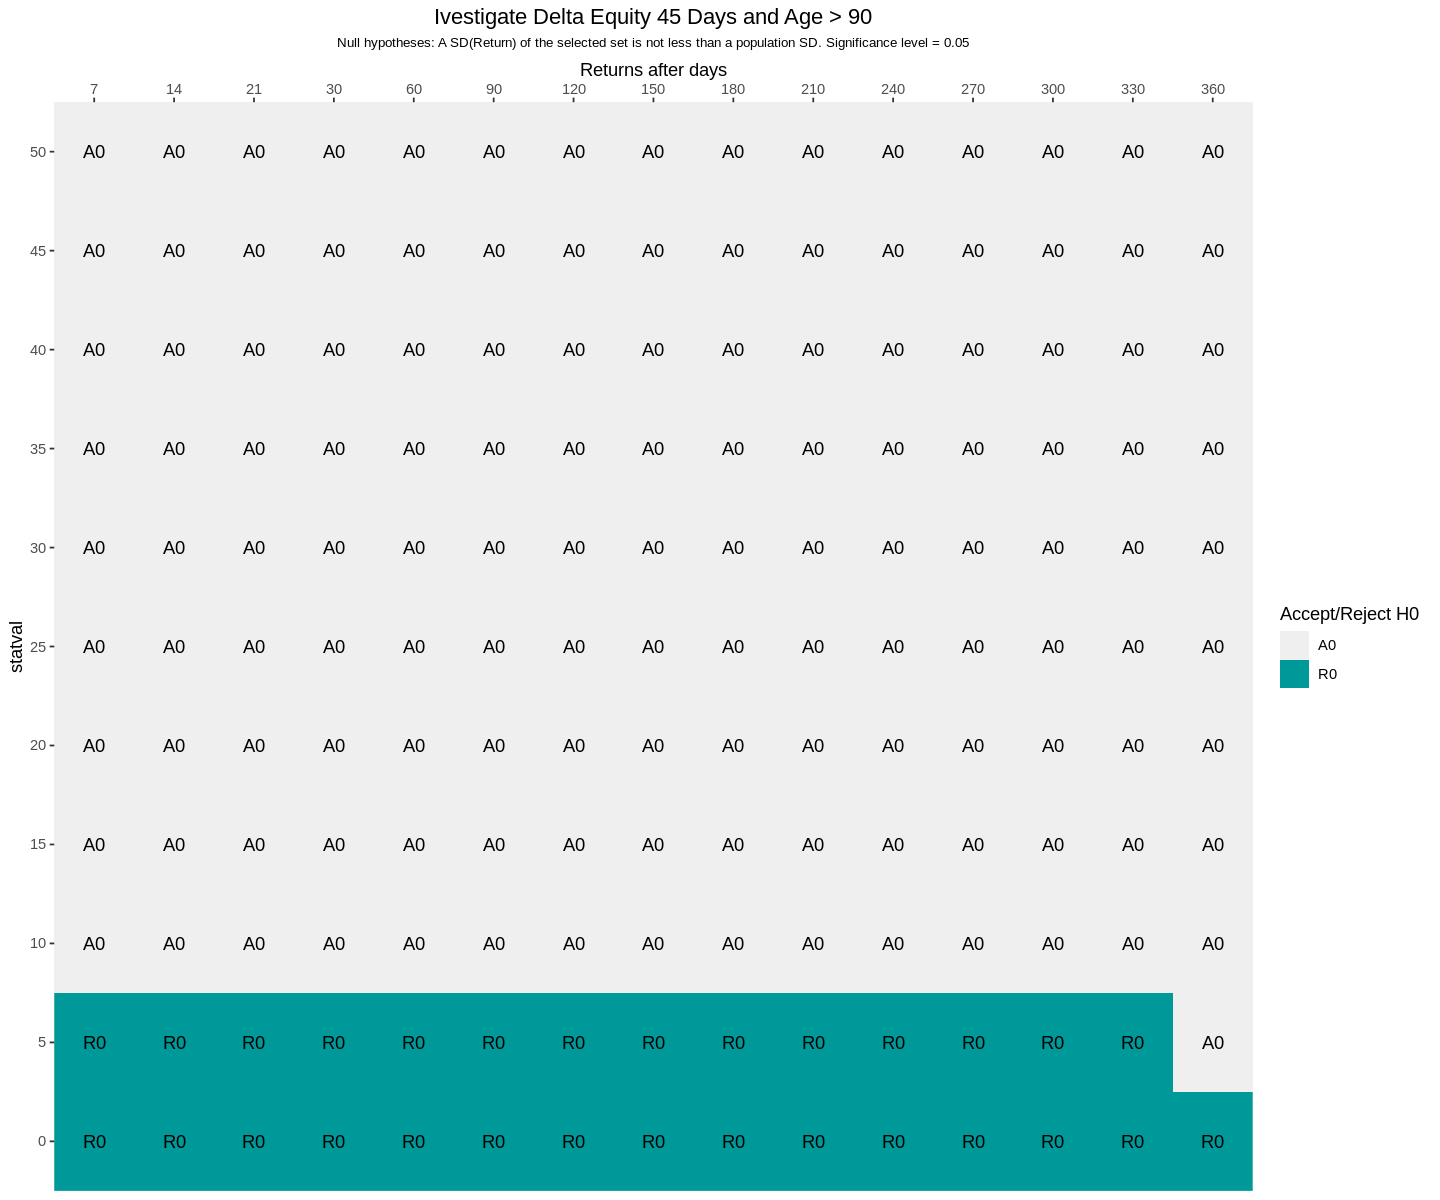

In [12]:
showSDLessHypothesisTest(experiment, result)

In [13]:
showObservationsCounts(experiment, result) 


The following table contains numbers of observations in the used statistics intervals.
A number of observations in the sample is an important part of the hypothesis testing. Be careful if it is low (less than 30).
Collective2 data are calculated in 7-days intervals. It means we have less observations which decreases hypotesis testing reliability. Use daily data tests if available.
Numbers of observations shown in this table are NOT numbers of C2 strategies! Every strategy can have many observations in any statistics interval. That is what is shown here.


Selection,Obs007,Obs014,Obs021,Obs030,Obs060,Obs090,Obs120,Obs150,Obs180,Obs210,Obs240,Obs270,Obs300,Obs330,Obs360
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
45 <= statval < 50,68,67,66,65,56,45,37,35,28,23,23,19,16,15,10
40 <= statval < 45,126,124,120,118,101,88,76,66,54,43,37,31,27,22,19
35 <= statval < 40,176,173,170,165,152,134,113,100,86,76,67,62,53,45,37
30 <= statval < 35,261,256,251,242,212,187,159,146,133,116,101,86,80,63,48
25 <= statval < 30,510,502,485,476,432,367,321,283,249,230,210,186,164,138,115
20 <= statval < 25,881,863,852,834,744,661,575,486,440,401,357,311,273,229,194
15 <= statval < 20,1683,1661,1634,1585,1456,1287,1125,1001,913,838,749,668,592,530,468
10 <= statval < 15,3093,3054,2998,2942,2691,2359,2115,1898,1736,1595,1431,1275,1132,1037,955
5 <= statval < 10,6241,6154,6055,5919,5463,4879,4452,4051,3694,3408,3035,2727,2435,2167,1974



SampleMetricValue minus PopulationMetricValue

This table shows differences between metric values calculated for the whole population and the current sample metric values. (See the chapter 'Population statistics'.)
This is different from our hypothesis test. Our hypothesis test tests an (alternative) hypothesis 'Is a mean of the sample greater than a mean of the population?'
But our metric is 'Mean divided by SD'. So the standard deviation plays a role in it.
Our metric is greater when a numerator is greater and/or denominator is less. It is up to you what you prefer.



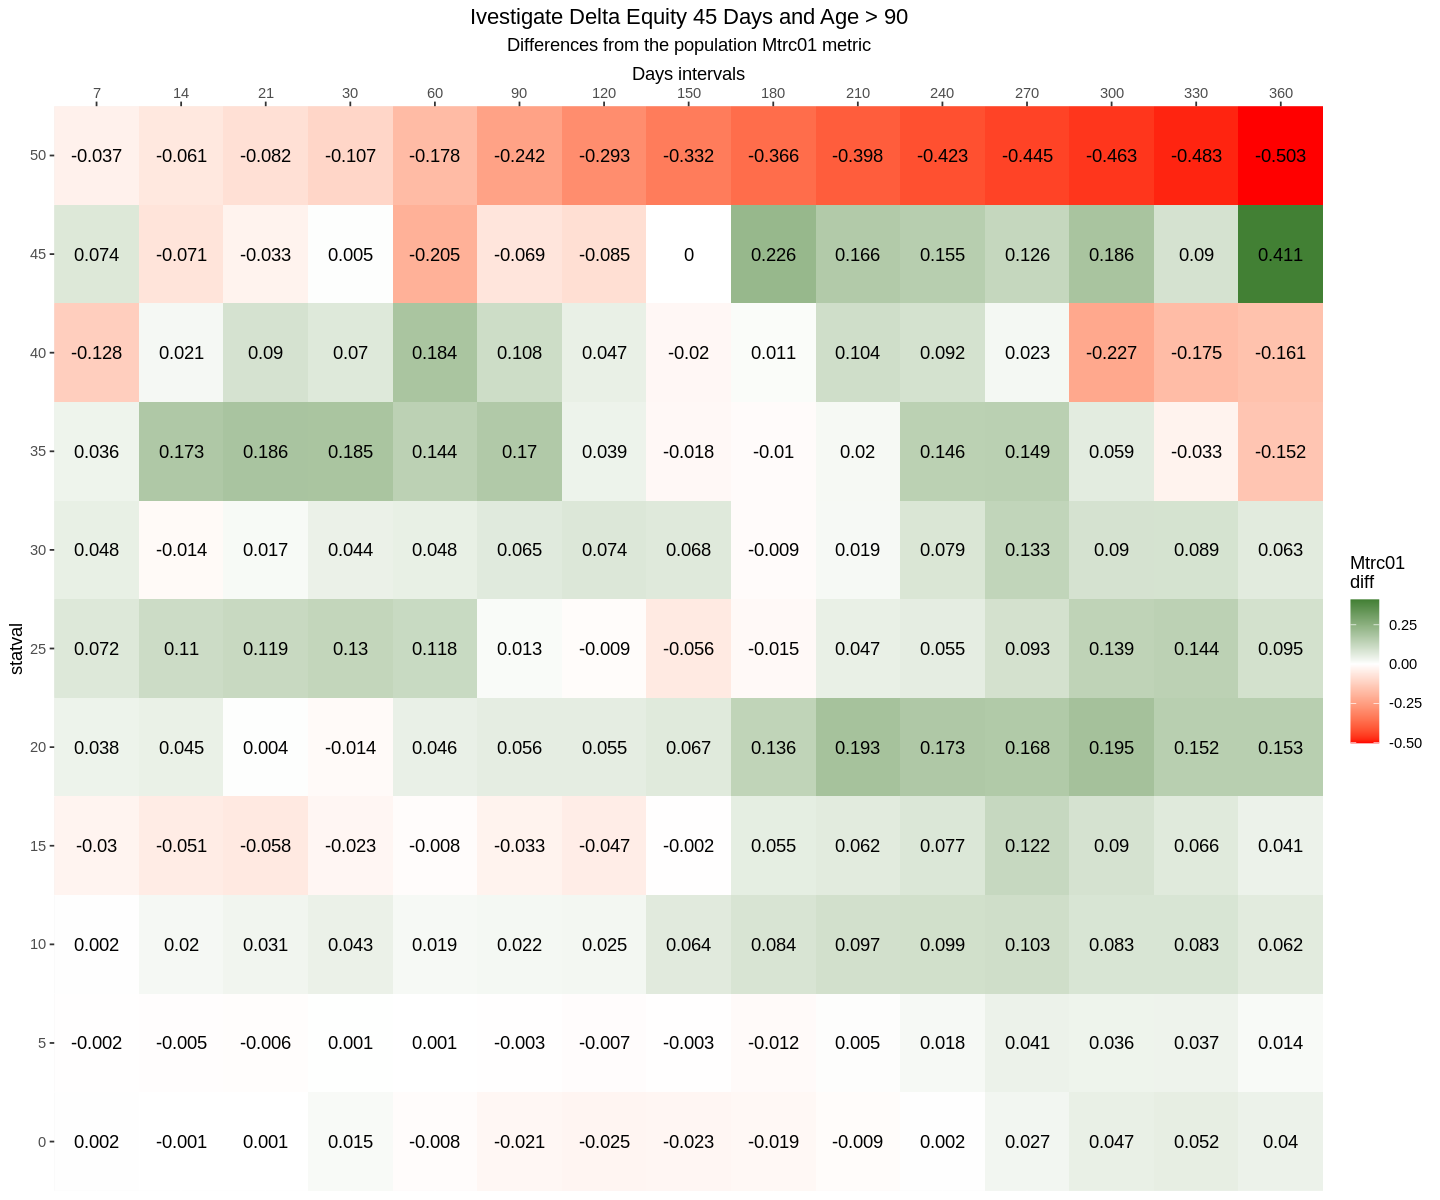

In [14]:
showMetricDifferences(experiment, result)

In [15]:
showSystemsCounts(experiment, result)



Numbers of strategies observed in defined intervals.

Selection,Sys007,Sys014,Sys021,Sys030,Sys060,Sys090,Sys120,Sys150,Sys180,Sys210,Sys240,Sys270,Sys300,Sys330,Sys360
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
45 <= statval < 50,53,52,51,50,41,35,30,28,23,18,18,16,13,12,8
40 <= statval < 45,87,85,84,82,69,60,50,44,37,32,27,24,21,17,16
35 <= statval < 40,116,114,111,109,100,92,76,69,64,59,53,48,42,39,32
30 <= statval < 35,166,163,158,155,134,117,98,86,78,71,66,59,53,45,36
25 <= statval < 30,249,248,234,230,204,180,162,140,121,110,103,90,81,67,51
20 <= statval < 25,356,348,343,335,291,257,231,201,179,163,149,136,120,100,84
15 <= statval < 20,532,524,511,491,431,373,327,288,262,241,218,196,180,158,133
10 <= statval < 15,717,705,684,667,594,514,459,410,363,338,306,266,240,212,183
5 <= statval < 10,938,914,891,867,761,658,573,512,456,422,372,332,295,257,237


### Discussion

..............................